# Team Hulk Project

For our project, we looked into... (part1) api, eda, cleaning (what you will probably say in presentation)

mention your parts then mention my parts or whoever is first, my parts are about (which hashtags were trending about trump throughout the day.)


In [1]:
import json
tweets = []
for line in open('realData.json', 'r'):
    tweets.append(json.loads(line))

A total of 367,819 tweets were collected. And they looked something like this: 
![](jsonSS.png)

After entering all of the data we gathered, we went ahead and json_normalized our data into a pandas dataframe. There were over 400 columns but a majority of them had to be dropped due to the columns containing too much NaN and/or due to the fact that the columns were not of interest for our project. We utilized the df.drop method because we weren't sure if there was a faster way to parse through each of the 400 normalized columns in our dataframe. In light of all this, our data cleaning looked like:

In [22]:
#Data Cleaning
import pandas as pd
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', None)
jsonData = json_normalize(tweets)
jsonData = jsonData.drop(columns=["contributors", "coordinates", "display_text_range", "entities.media", "entities.symbols", "entities.urls", "extended_tweet.full_text", "extended_entities.media", "extended_tweet.display_text_range", "extended_tweet.entities.hashtags", "extended_tweet.entities.media", "extended_tweet.entities.urls", "extended_tweet.entities.symbols", "extended_tweet.entities.user_mentions", "extended_tweet.extended_entities.media"])
jsonData = jsonData.drop(columns=["favorited", "favorite_count", "filter_level", "geo", "id", "id_str", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str"])
jsonData = jsonData.drop(columns=["place", "place.bounding_box.coordinates", "place.bounding_box.type", "place.country", "place.country_code", "place.full_name", "place.id", "place.name", "place.place_type", "place.url", "possibly_sensitive"])
jsonData = jsonData.drop(columns=["quote_count", "quoted_status.contributors", "quoted_status.coordinates", "quoted_status.created_at", "quoted_status.display_text_range", "quoted_status.entities.hashtags", "quoted_status.entities.media", "quoted_status.entities.symbols", "quoted_status.entities.urls", "quoted_status.entities.user_mentions", "quoted_status.extended_entities.media", "quoted_status.extended_tweet.display_text_range", "quoted_status.extended_tweet.entities.hashtags", "quoted_status.extended_tweet.entities.media", "quoted_status.extended_tweet.entities.symbols", "quoted_status.extended_tweet.entities.urls", "quoted_status.extended_tweet.entities.user_mentions", "quoted_status.extended_tweet.extended_entities.media", "quoted_status.extended_tweet.full_text", "quoted_status.favorite_count", "quoted_status.filter_level", "quoted_status.geo", "quoted_status.favorited", "quoted_status.id", "quoted_status.id_str", "quoted_status.in_reply_to_screen_name", "quoted_status.in_reply_to_status_id", "quoted_status.in_reply_to_status_id_str", "quoted_status.in_reply_to_user_id", "quoted_status.in_reply_to_user_id_str", "quoted_status.is_quote_status", "quoted_status.lang", "quoted_status.place", "quoted_status.possibly_sensitive", "quoted_status.quote_count", "quoted_status.reply_count", "quoted_status.retweet_count", "quoted_status.retweeted", "quoted_status.source", "quoted_status.text", "quoted_status.truncated"])
jsonData = jsonData.drop(columns=["quoted_status.user.contributors_enabled", "quoted_status.user.created_at", "quoted_status.user.default_profile", "quoted_status.user.default_profile_image", "quoted_status.user.description", "quoted_status.user.favourites_count", "quoted_status.user.follow_request_sent", "quoted_status.user.followers_count", "quoted_status.user.following", "quoted_status.user.friends_count", "quoted_status.user.geo_enabled", "quoted_status.user.id", "quoted_status.user.id_str", "quoted_status.user.is_translator", "quoted_status.user.lang", "quoted_status.user.listed_count", "quoted_status.user.location", "quoted_status.user.name", "quoted_status.user.notifications", "quoted_status.user.profile_background_color", "quoted_status.user.profile_background_image_url", "quoted_status.user.profile_background_image_url_https", "quoted_status.user.profile_background_tile", "quoted_status.user.profile_banner_url", "quoted_status.user.profile_image_url", "quoted_status.user.profile_image_url_https", "quoted_status.user.profile_link_color", "quoted_status.user.profile_sidebar_border_color", "quoted_status.user.profile_sidebar_fill_color", "quoted_status.user.profile_text_color", "quoted_status.user.profile_use_background_image", "quoted_status.user.protected", "quoted_status.user.screen_name", "quoted_status.user.statuses_count", "quoted_status.user.time_zone", "quoted_status.user.translator_type", "quoted_status.user.url", "quoted_status.user.utc_offset", "quoted_status.user.verified", "quoted_status_id", "quoted_status_id_str", "quoted_status_permalink.display", "quoted_status_permalink.url", "quoted_status_permalink.expanded"])
jsonData = jsonData.drop(columns=["reply_count", "retweet_count", "retweeted", "retweeted_status.contributors", "retweeted_status.coordinates", "retweeted_status.display_text_range", "retweeted_status.entities.hashtags", "retweeted_status.entities.media", "retweeted_status.entities.symbols", "retweeted_status.entities.urls", "retweeted_status.entities.user_mentions", "retweeted_status.extended_entities.media", "retweeted_status.extended_tweet.entities.hashtags", "retweeted_status.extended_tweet.entities.media", "retweeted_status.extended_tweet.entities.symbols", "retweeted_status.extended_tweet.entities.urls", "retweeted_status.extended_tweet.entities.user_mentions", "retweeted_status.extended_tweet.display_text_range", "retweeted_status.extended_tweet.extended_entities.media", "retweeted_status.extended_tweet.extended_entities.media", "retweeted_status.favorited", "retweeted_status.filter_level", "retweeted_status.geo", "retweeted_status.id", "retweeted_status.id_str", "retweeted_status.in_reply_to_screen_name", "retweeted_status.in_reply_to_status_id", "retweeted_status.in_reply_to_status_id_str", "retweeted_status.in_reply_to_user_id", "retweeted_status.in_reply_to_user_id_str", ])
jsonData = jsonData.drop(columns=["retweeted_status.place", "retweeted_status.place.bounding_box.coordinates", "retweeted_status.place.bounding_box.type", "retweeted_status.place.country", "retweeted_status.place.country_code", "retweeted_status.place.full_name", "retweeted_status.place.id", "retweeted_status.place.name", "retweeted_status.place.place_type", "retweeted_status.place.url", "retweeted_status.possibly_sensitive", "retweeted_status.quoted_status.contributors", "retweeted_status.quoted_status.coordinates", "retweeted_status.quoted_status.created_at", "retweeted_status.quoted_status.display_text_range", "retweeted_status.quoted_status.entities.hashtags", "retweeted_status.quoted_status.entities.media", "retweeted_status.quoted_status.entities.symbols", "retweeted_status.quoted_status.entities.urls", "retweeted_status.quoted_status.entities.user_mentions", "retweeted_status.quoted_status.extended_entities.media", "retweeted_status.quoted_status.extended_tweet.display_text_range", "retweeted_status.quoted_status.extended_tweet.entities.hashtags", "retweeted_status.quoted_status.extended_tweet.entities.media", "retweeted_status.quoted_status.extended_tweet.entities.symbols", "retweeted_status.quoted_status.extended_tweet.entities.urls", "retweeted_status.quoted_status.extended_tweet.entities.user_mentions", "retweeted_status.quoted_status.extended_tweet.extended_entities.media"])
jsonData = jsonData.drop(columns=["retweeted_status.quoted_status.extended_tweet.full_text", "retweeted_status.quoted_status.favorite_count", "retweeted_status.quoted_status.favorited", "retweeted_status.quoted_status.filter_level", "retweeted_status.quoted_status.geo", "retweeted_status.quoted_status.id", "retweeted_status.quoted_status.id_str", "retweeted_status.quoted_status.in_reply_to_screen_name", "retweeted_status.quoted_status.in_reply_to_status_id", "retweeted_status.quoted_status.in_reply_to_status_id_str", "retweeted_status.quoted_status.in_reply_to_user_id", "retweeted_status.quoted_status.in_reply_to_user_id_str", "retweeted_status.quoted_status.is_quote_status", "retweeted_status.quoted_status.lang", "retweeted_status.quoted_status.place", "retweeted_status.quoted_status.possibly_sensitive", "retweeted_status.quoted_status.quote_count", "retweeted_status.quoted_status.reply_count", "retweeted_status.quoted_status.retweeted", "retweeted_status.quoted_status.source", "retweeted_status.quoted_status.text", "retweeted_status.quoted_status.truncated", "retweeted_status.quoted_status.retweet_count"])
jsonData = jsonData.drop(columns=["retweeted_status.quoted_status.user.contributors_enabled", "retweeted_status.quoted_status.user.created_at", "retweeted_status.quoted_status.user.default_profile", "retweeted_status.quoted_status.user.default_profile_image", "retweeted_status.quoted_status.user.description", "retweeted_status.quoted_status.user.favourites_count", "retweeted_status.quoted_status.user.follow_request_sent", "retweeted_status.quoted_status.user.followers_count", "retweeted_status.quoted_status.user.following", "retweeted_status.quoted_status.user.friends_count", "retweeted_status.quoted_status.user.geo_enabled", "retweeted_status.quoted_status.user.id", "retweeted_status.quoted_status.user.id_str", "retweeted_status.quoted_status.user.is_translator", "retweeted_status.quoted_status.user.lang", "retweeted_status.quoted_status.user.listed_count", "retweeted_status.quoted_status.user.location", "retweeted_status.quoted_status.user.name", "retweeted_status.quoted_status.user.notifications"])
jsonData = jsonData.drop(columns=["retweeted_status.quoted_status.user.profile_background_color", "retweeted_status.quoted_status.user.profile_background_image_url", "retweeted_status.quoted_status.user.profile_background_image_url_https", "retweeted_status.quoted_status.user.profile_background_tile", "retweeted_status.quoted_status.user.profile_banner_url", "retweeted_status.quoted_status.user.profile_image_url", "retweeted_status.quoted_status.user.profile_image_url_https", "retweeted_status.quoted_status.user.profile_link_color", "retweeted_status.quoted_status.user.profile_sidebar_border_color", "retweeted_status.quoted_status.user.profile_sidebar_fill_color", "retweeted_status.quoted_status.user.profile_text_color", "retweeted_status.quoted_status.user.profile_use_background_image", "retweeted_status.quoted_status.user.protected", "retweeted_status.quoted_status.user.screen_name", "retweeted_status.quoted_status.user.statuses_count", "retweeted_status.quoted_status.user.time_zone", "retweeted_status.quoted_status.user.translator_type", "retweeted_status.quoted_status.user.url", "retweeted_status.quoted_status.user.utc_offset", "retweeted_status.quoted_status.user.verified", "retweeted_status.quoted_status_id", "retweeted_status.quoted_status_id_str", "retweeted_status.quoted_status_permalink.display", "retweeted_status.quoted_status_permalink.expanded", "retweeted_status.quoted_status_permalink.url"])
jsonData = jsonData.drop(columns=["retweeted_status.user.default_profile", "retweeted_status.user.profile_background_color", "retweeted_status.user.following", "retweeted_status.user.id", "retweeted_status.user.id_str", "retweeted_status.user.is_translator", "retweeted_status.user.lang", "retweeted_status.user.notifications", "retweeted_status.user.profile_background_image_url", "retweeted_status.user.profile_background_image_url_https", "retweeted_status.user.profile_background_tile", "retweeted_status.user.profile_banner_url", "retweeted_status.user.profile_image_url_https", "retweeted_status.user.profile_link_color", "retweeted_status.user.profile_sidebar_border_color", "retweeted_status.user.profile_sidebar_fill_color", "retweeted_status.user.profile_text_color", "retweeted_status.user.profile_use_background_image", "retweeted_status.user.protected", "retweeted_status.user.follow_request_sent", "retweeted_status.user.profile_image_url"])
jsonData = jsonData.drop(columns=["retweeted_status.user.time_zone", "retweeted_status.user.translator_type", "retweeted_status.user.url", "retweeted_status.user.utc_offset", "retweeted_status.user.default_profile_image", "retweeted_status.user.contributors_enabled"])
jsonData = jsonData.drop(columns=["source", "timestamp_ms", "truncated"])
jsonData = jsonData.drop(columns=["user.default_profile_image", "user.contributors_enabled", "user.id", "user.id_str", "user.is_translator", "user.following", "user.follow_request_sent", "user.lang", "user.notifications", "user.profile_text_color", "user.protected", "user.profile_background_color", "user.profile_use_background_image", "user.profile_background_image_url", "user.profile_background_image_url_https", "user.profile_background_tile", "user.profile_banner_url", "user.profile_image_url", "user.profile_image_url_https", "user.profile_link_color", "user.profile_sidebar_border_color", "user.profile_sidebar_fill_color", "user.time_zone", "user.translator_type", "user.url", "user.utc_offset"])
#For test data only
jsonData = jsonData.drop(columns=["coordinates.coordinates", "coordinates.type", "geo.coordinates", "geo.type", "quoted_status.coordinates.coordinates", "quoted_status.coordinates.type", "quoted_status.geo.coordinates", "quoted_status.geo.type", "quoted_status.place.bounding_box.coordinates", "quoted_status.place.bounding_box.type", "quoted_status.place.country", "quoted_status.place.country_code", "quoted_status.place.full_name", "quoted_status.place.id", "quoted_status.place.name", "quoted_status.place.place_type", "quoted_status.place.url", "quoted_status.quoted_status_id", "quoted_status.quoted_status_id_str", "quoted_status.scopes.followers", "retweeted_status.coordinates.coordinates", "retweeted_status.coordinates.type", "retweeted_status.geo.coordinates", "retweeted_status.geo.type", "retweeted_status.quoted_status.place.bounding_box.coordinates", "retweeted_status.quoted_status.place.bounding_box.type", "retweeted_status.quoted_status.place.country", "retweeted_status.quoted_status.place.country_code", "retweeted_status.quoted_status.place.full_name", "retweeted_status.quoted_status.place.id", "retweeted_status.quoted_status.place.name", "retweeted_status.quoted_status.place.place_type", "retweeted_status.quoted_status.place.url", "retweeted_status.quoted_status.quoted_status_id", "retweeted_status.quoted_status.quoted_status_id_str", "retweeted_status.scopes.followers", "retweeted_status.withheld_in_countries", "withheld_in_countries"])

## Trending Tweets About Trump Throughout the Day

In order to parse through the hashtags, we first need to make them readable. This next block is just some extra string cleaning to make the hashtags look more presentable.

In [3]:
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].astype(str)
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\{u\'[a-z]*\':\s\[[0-9]*,\s[0-9]*\]", "") #Deletes useless words ( u'indicies': ' )
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r",\su\'[a-z]*\':\su\'", "") #Same as above BUT for indicies that comes after
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\}", "") #Deletes stray close curly brackets from first replace function ( } )
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\[\]", "") #Deletes stray "no hashtags" written as brackets ( [] ) 
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\'*", "") #Delets stray quote marks ( ' )
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r",\s[a-zA-Z]*", "") #Deletes multiple hashtags
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\[", "") #Deletes the open bracket in the beginning
jsonData['entities.hashtags'] = jsonData['entities.hashtags'].str.replace(r"\]", "") #Deletes the close bracket in the end
dataHashTags = jsonData[jsonData['entities.hashtags'] != ''] #Removes blank hashtag indicator that was left from replace function
dataHashTags['entities.hashtags'].describe()

count                     24820
unique                     2869
top       TrumpThreatensAmerica
freq                       3518
Name: entities.hashtags, dtype: object

Only 24,820 out of 367,819 tweets (6.7%) contained any kind of hashtag. So we dug deeper into the hashtags that trended when mentioning "Donald Trump". The next block counts the total amount of unique hashtags that were used when mentioning President Trump. As you can see, #TrumpThreatensAmerica was mentioned 3518 times followed by #DemocratsStandTall for 2828 times! These two hashtags made up the majority of the hashtags that were in our dataset. 

An interesting thing to note is that there is a total of 134 usage of the hashtag \u06a9\u067e\u062a... and so on. We looked this up and it turns out that they are from errors most likely from the conversion between Twitter data and json format. 

In [4]:
mostUsedHashtag = dataHashTags['entities.hashtags'].value_counts()
mostUsedHashtag = mostUsedHashtag.sort_values(ascending=False)
mostUsedHashtag

TrumpThreatensAmerica                                                                                                          3518
DemocratsStandTall                                                                                                             2828
WomenforTrump                                                                                                                   930
Trump19                                                                                                                         796
Trump                                                                                                                           724
NotMyChild                                                                                                                      420
MakeAmericaGreatAgain                                                                                                           345
NEW                                                                         

Here is a graphical representation of the information above. An interesting thing to note in this graph is that during the ongoing pandemic, the hashtag #COVID19 was ranked 23 as the most used when mentioning Trump. However, the hashtag #LinkinPark was ranked 19 overall when mentioning Trump. We found that funny because when you think about Donald Trump, the first thing that comes to your mind would be anything BUT LinkinPark. So we looked into this and discovered that during the data collection phase, LinkinPark has gone forward to sue President Trump for using their song "In The End" in one of his campaign ad.

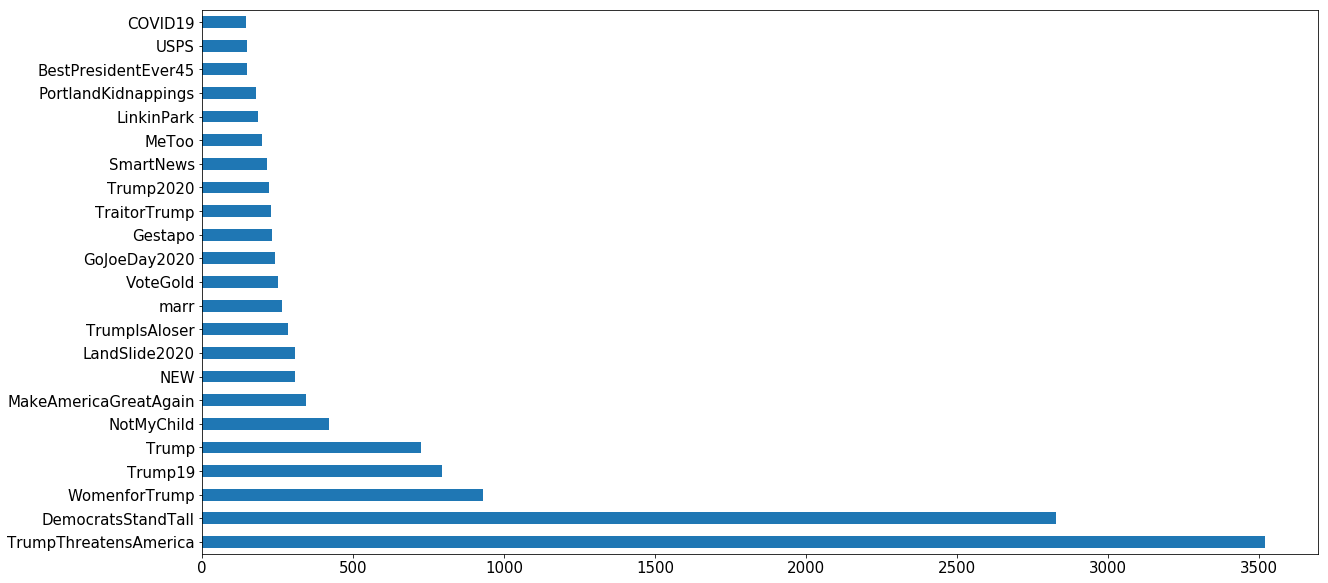

In [5]:
%matplotlib inline
mostUsedHashtag.nlargest(23).plot.barh(fontsize = 15, figsize = (20,10))

To get a better idea of trending hashtags that mentioned Trump, we decided to split up the data into 4 time slots; Morning, Noon, Night, Overnight. However, we ran into a problem because the time the tweets were created were given to us in this format:

In [7]:
jsonTime = jsonData.copy()
jsonTime.created_at[0]

u'Sun Jul 19 00:02:11 +0000 2020'

To fix this, we had to clean this column by using the .str.replace() method. Since we have knowledge in regexs already, deleting excess string and converting the column into an int was a breeze. Now the time was in this format:

In [8]:
jsonTime['created_at'] = jsonTime['created_at'].str.replace(r"[a-zA-Z]*\s[a-zA-Z]*\s[0-9]*", "") #Deletes the day and month since it's not needed in this observation
jsonTime['created_at'] = jsonTime['created_at'].str.replace(r"\+(0000)*\s", "") #Deletes +0000, don't know why it's there but recorded time is +7hr from PST
jsonTime['created_at'] = jsonTime['created_at'].str.replace(r"(2020)*", "") #Deletes year since we will always be in 2020 right now
jsonTime['created_at'] = jsonTime['created_at'].str.replace(":", "") #Clean stray colons ( : )
jsonTime['created_at'] = jsonTime['created_at'].astype(int) #Convert to int so we can compare values
jsonTime.created_at[0]

211

However, this format of hh:mm:ss was still 7hrs ahead of our timezone(PST). To fix this, we had to convert the time. However, you can not simply just subtract 7hrs from the time otherwise you will end up with negative time. This was solved by adding 24hrs(an additional day) then subtracting 7hrs and modding the number by 24hrs again. Then you will end up with something like this:

In [9]:
#Note that time is formatted in hh:mm:ss (h for hours, m for minutes, s for seconds).
jsonTime['created_at'] = (jsonTime['created_at'] + 240000 - 70000) % 240000 #Add 24hrs then subtract 7hrs then mod by 24hrs so we don't get negative hours when converting to PST
jsonTime.created_at[0]

170211

Finally, we have to split the 4 time slots into their own category. Morning (6am-11am), Noon (11am-2pm), Night (6pm-12am), Overnight (12am-6am).

NOTE: WE COLLECTED DATA FROM 5pm TO 1pm THE NEXT DAY. THEREFORE, WE ARE MISSING 4hrs OF DATA SO THERE WILL BE A SLIGHT BIAS IN THE NOON SECTION.

In [10]:
mornings = jsonTime[(jsonTime['created_at'] >= 130000) & (jsonTime['created_at'] < 180000)]
mornings['estTime'] = "Morning (6am-11am)"

noon = jsonTime[(jsonTime['created_at'] <= 10000) | (jsonTime['created_at'] >= 180000)]
noon['estTime'] = "Noon (11am-2pm)"

night = jsonTime[(jsonTime['created_at'] < 70000) & (jsonTime['created_at'] > 10000)]
night['estTime'] = "Night (6pm-12am)"

overnight = jsonTime[(jsonTime['created_at'] >= 70000) & ((jsonTime['created_at'] < 130000)) ]
overnight['estTime'] = "Overnight (12am-6am)"

tempTime = mornings.append(noon).append(night).append(overnight) #Takes soooooo long
#tempTime.tail()

/home/jtang073/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jtang073/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/jtang073/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

NOTE: IGNORE THE WARNINGS WE LIKE TO LIVE ON THE EDGE

Despite the 3 hours missing from Noon, it was the second highest in terms of tweets per time slot. An interesting thing to note is that a lot of people like to stay up overnight just to tweet about Trump. This information seemed intriguing so we looked even deeper into this.

estTime,Morning (6am-11am),Night (6pm-12am),Noon (11am-2pm),Overnight (12am-6am)
entities.hashtags,33663,68185,96915,169057


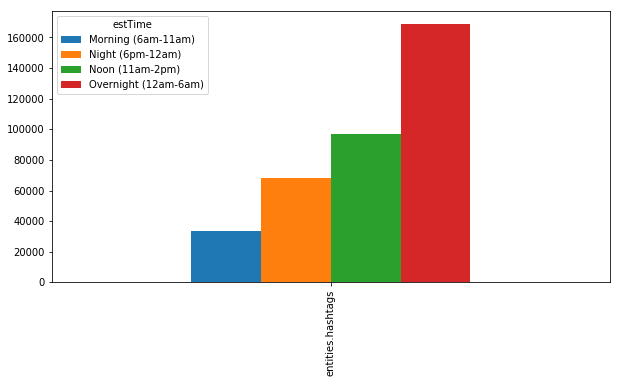

In [21]:
#tempTime.groupby('estTime')['entities.hashtags'].value_counts().nlargest(10).plot.bar()
table = pd.pivot_table(tempTime, values = {"entities.hashtags"}, columns = {"estTime"}, aggfunc="count")
table.plot.bar(figsize = (10,5))
table

Side note: We tried using pivot tables to combine the 4 time slots into a single bar graph. However, we would not find the keyword for aggfunc to give us only the top 5 hashtags of each time slot. It was only giving us ALL of the hashtags in each time slot and kept plotting all 24,820 hashtags into a single bar graph. So we decided to just leave them splitted and utilized the .nlargest() function.

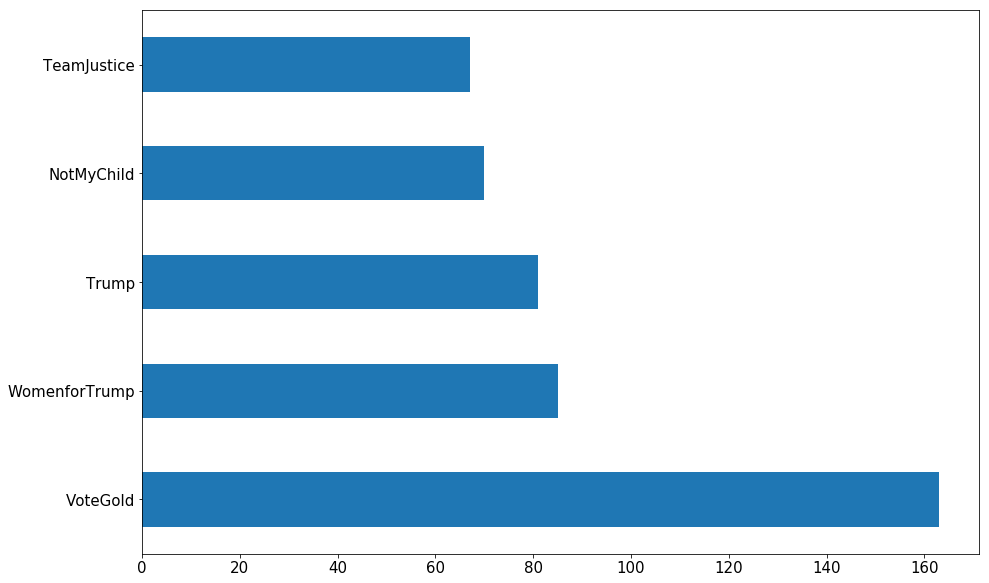

In [12]:
mornings = mornings[mornings['entities.hashtags'] != ""]
mornings['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Morning (6am-11am)

In the morning, 3 out of 5 trending hashtags about Trump were positive; Those being Trump, WomenforTrump, and VoteGold. Apparently there is a Twitter fan page called "WomenForTrump" that serves as a place for women, who support Trump, to converse.

Only 2 out of 5 trending hashtags were negative towards Trump in the morning; Those being TeamJustice and NotMyChild. Apparently it looks like the Trump Administration was trying to push for schools to open and parents took it in a negative way.

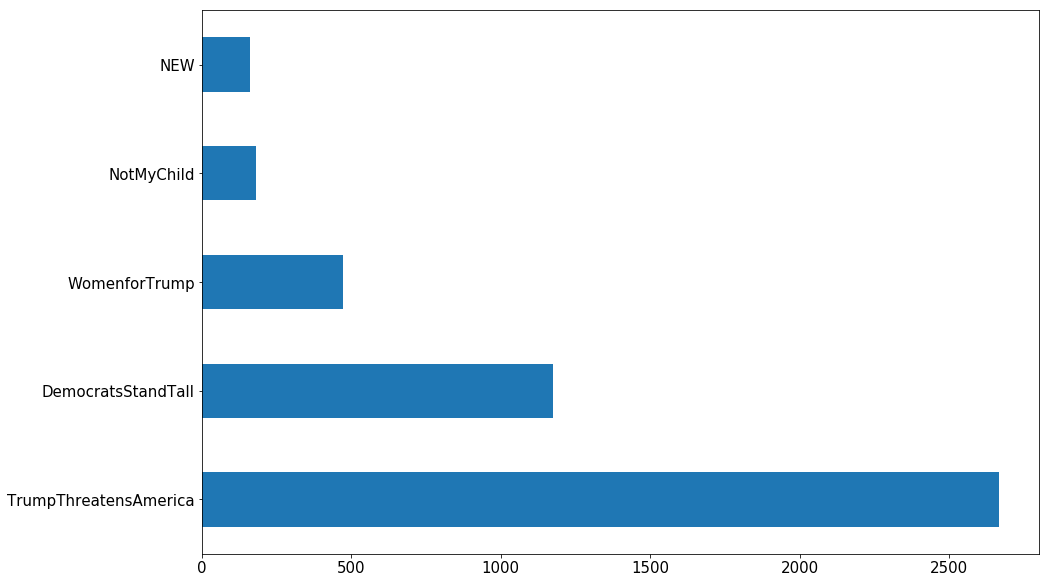

In [13]:
noon = noon[noon['entities.hashtags'] != ""]
noon['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Noon (11am-2pm)

In the noon, only 2 out of 5 trending hashtags about Trump were positive; Those being NEW and WomenforTrump. Apparently you are supposed to write #NEW to singal that your tweet is new...

3 out of 5 trending hashtags were negative towards Trump in the noon; Those being NotMyChild, DemocratsStandTall and TrumpThreatensAmerica. Apparently Twitter thinks Trump in yet again threatening Americans.

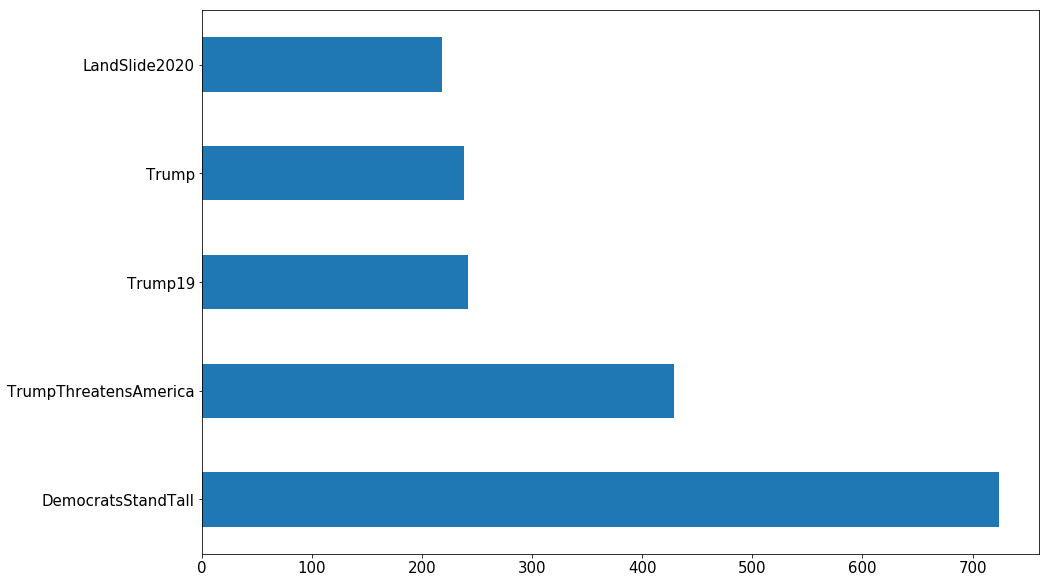

In [14]:
night = night[night['entities.hashtags'] != ""]
night['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Night (6pm-12am)

At night, only 2 out of 5 trending hashtags about Trump were positive; Those being LandSlide2020, and Trump. Apparently #LandSlide2020 is talking about Trump's projected presidential votes and not an actual landslide somewhere in the mountains.

3 out of 5 trending hashtags were negative towards Trump at night; Those being DemocratsStandTall, TrumpThreatensAmerica and Trump19. Apparently Americans have decided to rename COVID19 to TRUMP19 to show their... love... for how Trump handled the pandemic.

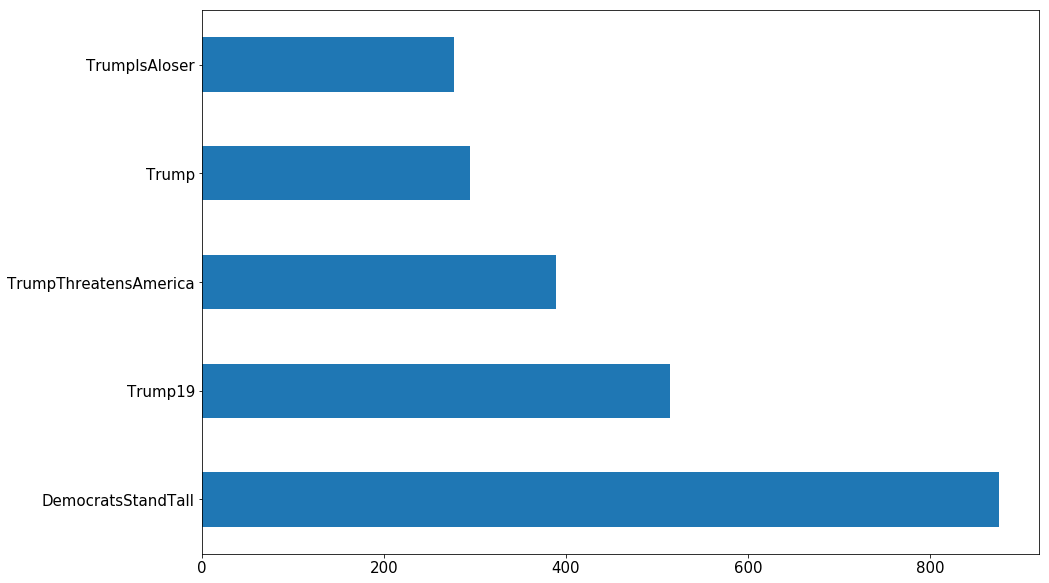

In [15]:
overnight = overnight[overnight['entities.hashtags'] != ""]
overnight['entities.hashtags'].value_counts().nlargest(5).plot.barh(fontsize = 15, figsize = (15,10)) #Overnight (12am-6am)

Overnight, only 1 out of 5 trending hashtags about Trump were positive; Those being just Trump. Apparently putting your name after a hashtag shows support.

4 out of 5 trending hashtags were negative towards Trump overnight; Those being DemocratsStandTall TrumpIsAloser, TrumpThreatensAmerica and Trump19. Apparently a lot of democrats like to stay up at night just to call for a Twitter uprising.


This thorough analysis supports the idea that the type of trending hashtags that mentions Donald Trump changes throughout the day. Mainstream events that relates to the president directly or indirectly will also affect the outcome of trending Twitter hashtags. It is also interesting to note that the majority of democratic supporters can be found on the west coast, which is probably why night/overnight was dominated by negative comments towards Trump. At the end of the day, you can extrapolate some advice from this analysis; If you are a Republican, it is best to surf Twitter in the morning where a majority of supportive tweets can be found. However, if you are a democrat, you should wait until it is after dark before you speak strongly about President Trump.

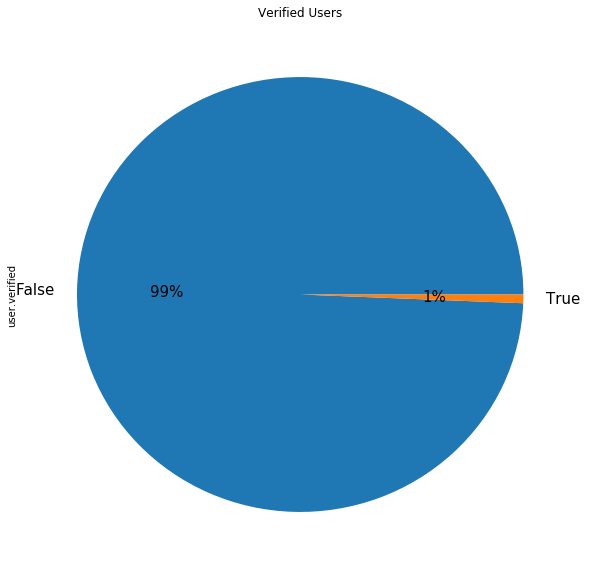

In [16]:
jsonData['user.verified'].value_counts().plot.pie(fontsize = 15, title= "Verified Users", figsize = (10,10), autopct = '%1.0f%%') #Delete if you don't need